# W2D1 Tutorial 1: Distributions

#### __Week 2, Day 4, Extremes & Vulnerability__
##### __Content creators:__ Matthias Aengenheyster, Joeri Reinders
##### __Content reviewers:__ TBD
##### __Content editors:__ TBD
##### __Production editors:__ TBD
##### __Our 2023 Sponsors:__ TBD

## Tutorial Objectives:

In this first tutorial we will have look at the distribution of annual extreme precipitation levels in Germany. Our task is to have a look at the different moments of the distribution: the mean, variance, skewness. 
By the end of the tutorial you will be able to:
- visualize an observational record as a timeseries and a distribution
- compute the *moments* of a record
- generate and plot a distribution with defined *moments*

## Setup

In [18]:
# Installs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
import os, pooch

fname = 'precipitationGermany_1920-2022.csv'
if not os.path.exists(fname):
    url = "https://osf.io/xs7h6/download"
    fname = pooch.retrieve(url, known_hash=None)

data = pd.read_csv(fname, index_col=0).set_index('years')
data.columns=['precipitation']
precipitation = data.precipitation

SHA256 hash of downloaded file: ef9f29e709a1db0745c28bcb9460dac22f6c9624de41d9e2187ab547e9aaa3c8
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


First inspect the precipitation record and plot it over time: 

In [4]:
precipitation

years
1920    24.5
1921    27.7
1922    15.6
1923    23.5
1924    59.9
        ... 
2018    31.6
2019    24.9
2020    33.3
2021    57.4
2022    25.4
Name: precipitation, Length: 103, dtype: float64

Text(0, 0.5, 'precipitation')

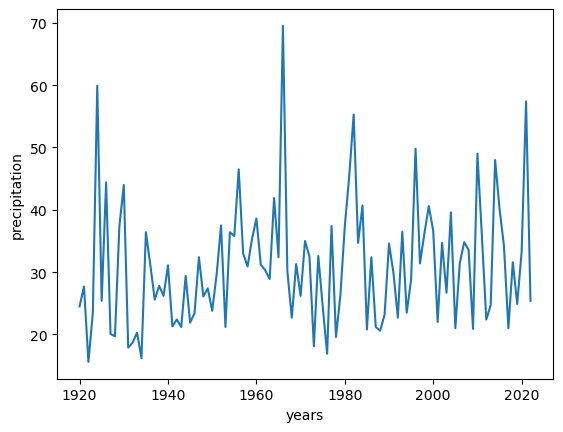

In [5]:
precipitation.plot()#(x='years',y='rr')
plt.ylabel('precipitation')

Now plot a histogram of the data. Recall that we can make a histogram of this data by plotting the y axis from the previous figure on the x axis of this new figure versus the count of how many data points fall within a 'bin' on the x-axis. 

Text(0.5, 0, 'precipitation')

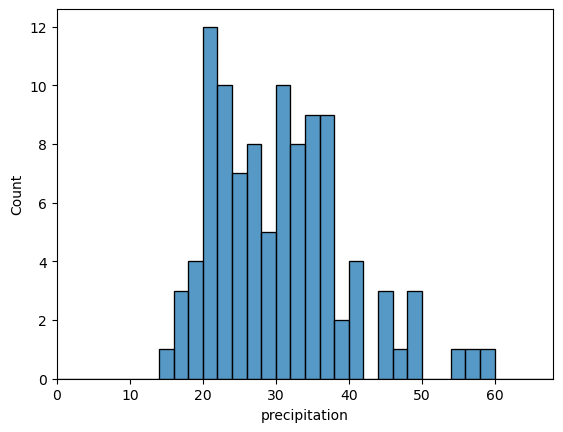

In [6]:
bins=np.arange(0,precipitation.max(),2)
sns.histplot(precipitation,bins=bins)
plt.xlim(bins[0],bins[-1])
plt.xlabel('precipitation')

Next compute the mean and the variance... Plot the mean as a verticle line in the histogram

In [7]:
mean_pr = precipitation.mean()
var_pr = precipitation.var()
std_pr = precipitation.std()

In [8]:
mean_pr, var_pr, std_pr

(30.97184466019417, 98.55047401484866, 9.927259139100212)

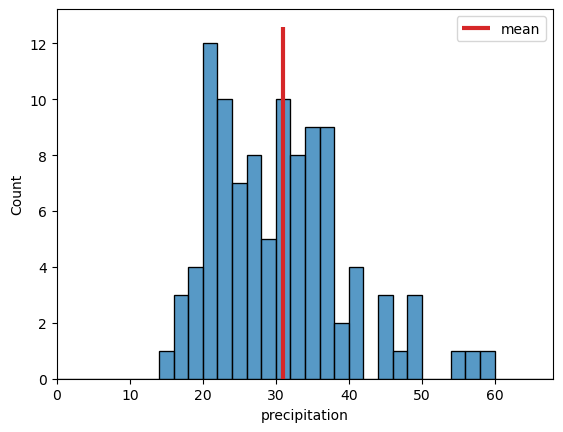

In [9]:
bins=np.arange(0,precipitation.max(),2)
sns.histplot(precipitation,bins=bins)
plt.xlim(bins[0],bins[-1])

ylim = plt.ylim()

plt.vlines(mean_pr,ymin=ylim[0],ymax=ylim[1],color='C3',lw=3,label='mean')
plt.xlabel('precipitation')
plt.legend()

As you can see the range of values on both sides of the the line is not equal. This hint at a skewed distribution. Lets check how big the potential skew is. Also generate a 100 random values from a normal distribution (mean = 0, standard deviation = 1) and compare its skewness that of precipitation:

In [10]:
precipitation.skew()

1.1484425874858337

In [11]:
data['random'] = np.random.normal(0,1,size=data.index.size)

In [12]:
data.skew()

precipitation    1.148443
random          -0.066804
dtype: float64

As you can see the skewness of our data is much larger than the data extracted from a normal distribution. To further explore this we can fit a normal distribution to our precipitation data. For this we need to compute mean and standard deviation of 'precipitation'which are the two parameters of a normal distribution. Using the scipy function norm.pdf we can draw a probability density function (pdf) next to our histogram. The pdf shows the probability we will find any level of precipitation based on the data. As you can expect the mean value will have the highest probability. 

In [13]:
from scipy import stats

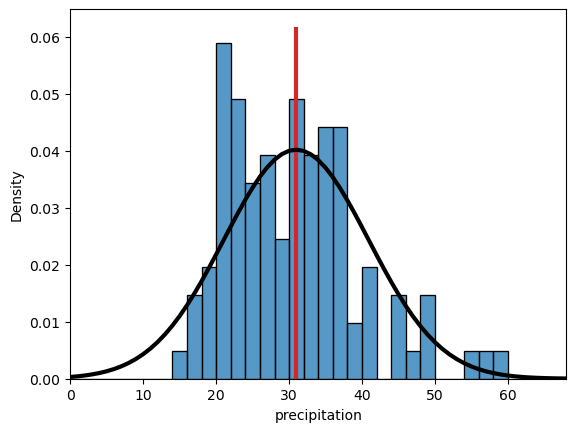

In [14]:
bins=np.arange(0,precipitation.max(),2)
sns.histplot(precipitation,bins=bins,stat='density')
plt.xlim(bins[0],bins[-1])

ylim = plt.ylim()

plt.vlines(mean_pr,ymin=ylim[0],ymax=ylim[1],color='C3',lw=3)

x = np.arange(0,100,1)
plt.plot(x,stats.norm.pdf(x,mean_pr,std_pr),c='k',lw=3)

## Coding excercise: Add uncertainty bands to the distribution
1. Create 1000 records of 100 samples each that are drawn from a normal distribution with the mean and standard deviation of the precipitation record
2. Compute the 5-th and 95-th percentiles accross the 1000-member ensemble and add them to the figure above to get an idea of the uncertainty.

Hint: you can use the function np.random.normal to draw from a normal distribution. Call ?np.random.normal or help(np.random.normal) to understand how to use it. np.quantile is useful for computing quantiles. 

### student:

In [ ]:
random_samples = np.random.normal(...)

In [ ]:
bins=np.arange(0,precipitation.max(),2)
sns.histplot(precipitation,bins=bins,stat='density')
plt.xlim(bins[0],bins[-1])

ylim = plt.ylim()

plt.vlines(mean_pr,ymin=ylim[0],ymax=ylim[1],color='C3',lw=3)

x = np.arange(0,100,1)
plt.plot(x,stats.norm.pdf(x,mean_pr,std_pr),c='k',lw=3)

plt.plot(x, ...) # 95-th percentile
plt.plot(x, ...) # 5-th percentile

### solution:

In [ ]:
random_samples = np.random.normal(mean_pr,std_pr,size=[100,1000])
pdfs = np.zeros([x.size,1000])

for i in range(1000):
    pdfi = stats.norm.pdf(x,random_samples[:,i].mean(),random_samples[:,i].std())
    pdfs[:,i] = pdfi

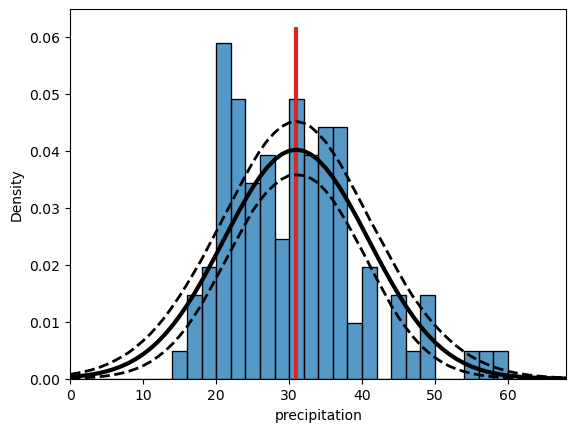

In [ ]:
bins=np.arange(0,precipitation.max(),2)
sns.histplot(precipitation,bins=bins,stat='density')
plt.xlim(bins[0],bins[-1])

ylim = plt.ylim()

plt.vlines(mean_pr,ymin=ylim[0],ymax=ylim[1],color='C3',lw=3)

x = np.arange(0,100,1)
plt.plot(x,stats.norm.pdf(x,mean_pr,std_pr),c='k',lw=3)

plt.plot(x, np.quantile(pdfs,0.95,axis=1),'--',lw=2,color='k')
plt.plot(x, np.quantile(pdfs,0.05,axis=1),'--',lw=2,color='k')

## Post-figure question:
1. What do you say now, does a normal distribution describe your model well? Why?
